### Quantum Cryptography - Day13
# Adaptive Basis Selection
In traditional BB84 like qunaum key distribution(QKD) ,Alice and Bob choose their measurement bases with fixed probabilities (usually 50% Z-basis and 50% X-basis ).while simple ,this approch is not always optimal . **Adaptive Basis Selection** improve efficiency by dynamically adjusting the probability of choosing a basis based on past measurement  outcomes and error rates.

In this notebook , we simulates and **ideal scenerio with no eavesdropper (no eve)** and study how adaptive basis selection can improve the secrete key rate.In this we will learn:
- Why fixed basis selection is inefficient
- How to trac past measurement error
- How to adjust basis probabilities dynamically
- Hoe adaptive stratergies imprive key rate
- Visual comparision of adaptive vs fixed basis selection

## Import Required Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1 : Simulation Parameters
we assume:
- No eavesdropper (only channel noise)
- A fixded intrinsic error probability 
- Large number of tranmitted qubits

This allow us to isolate the **effect of adaptive basis selection alone**

In [2]:
num_rounds=10000
channel_error=0.03 #intrinsic noise
np.random.seed(42)

## Step 2 : Fixed the Basis Selection Model
Here Alice and Bob choose Z and X basis with equal probabilities (50/50).
This standerd BB84 stratergies and serve as our baseline for comparision.

In [6]:
def fixed_basis_simulation(n,error_rate):
    alice_basis=np.random.choice([0,1],size=n) # 0=Z,1=X
    bob_basis=np.random.choice([0,1],size=n) 

    matched=alice_basis==bob_basis
    errors=np.random.rand(n)<error_rate

    valid_key=matched&(~errors)
    key_rate=np.sum(valid_key)/n

    return key_rate


## Step 3 :Adaptive Basis Selection
In this adaptive approch:
- We track past measurement errors
- If a basis show lower error .its selection probability is increased.
- This feedback loop improve efficiency over time

**Important** - It does NOT  change security assumption in the no-Eve scenerio.

In [15]:
def adaptive_basis_simulation(n,error_rate,learning_rate=0.05):
    p_z=0.5 # Initial probability for Z basis
    errors_z=[]
    errors_x=[]
    key_bits=0
    matched=0
    errors=0
    pz_history=[]

    for _ in range(n):
        alice_basis=0 if np.random.rand() < p_z else 1
        bob_basis=alice_basis
        matched+=1
        error=np.random.rand() <error_rate
        if error:
            errors+=1
        else:
            key_bits+=1

        if alice_basis==0:
            errors_z.append(error)
        else:
            errors_x.append(error)

        # Upadate probabilities using past error statistics 
        if len(errors_z) >20 and len(errors_x) >20 :
            ez=np.mean(errors_z)
            ex=np.mean(errors_x)

            p_z+=learning_rate*(ex-ez)
            p_z=np.clip(p_z,0.1,0.9)
        pz_history.append(p_z)
    qber=errors/matched
    key_rate=key_bits/n

    return key_rate,qber,pz_history


## Step 4 : Run Simulations

In [17]:
fixed_key_rate=fixed_basis_simulation(num_rounds,channel_error)
adaptive_key_rate,adaptive_qber,pz_history=adaptive_basis_simulation(num_rounds,channel_error)
fixed_key_rate,adaptive_key_rate

(np.float64(0.4891), 0.9739)

## Step 5 :  Plot Adaptive vs Fixed basis behavior

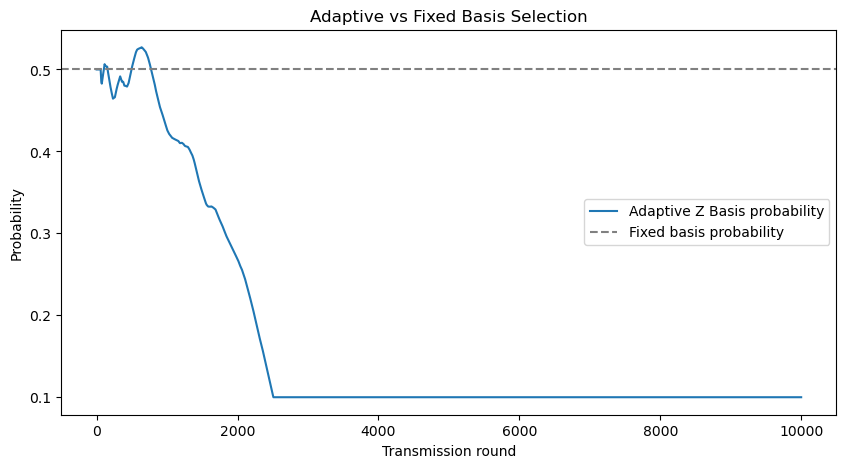

In [18]:
plt.figure(figsize=(10,5))
plt.plot(pz_history,label='Adaptive Z Basis probability')
plt.axhline(0.5,linestyle='--',color='gray',label='Fixed basis probability')
plt.xlabel('Transmission round')
plt.ylabel('Probability')
plt.title('Adaptive vs Fixed Basis Selection')
plt.legend()
plt.show()

the dashed gray line represents fixed basis selection with constant probability 0.5. The blue curve shows adaptive basis selection,which initially fluctuate due to limited statistics ,then covergence toward the lower error basis.once sufficient confidence is achived ,the probability saturates at the imposed lower bound(0.1) ,indicating strong preference for the optimal basis.

## Step 6 : Observation
- adaptive basis selection yields a higher key rate
- The improvement comes from reducing basis mismatch waste
- In a no-eve scenerio ,adaptively does not reduce security

Adaptive Basis selection improve efficiency without changing the physical channel.This idea is especially for practical QKD system with stable noise pattern.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day13_Adaptive_Basis_selection.ipynb

**Date created**: 05-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>